# Assignment 1: Feature Engineering 

Task 1: 

#1.1 Identify 5 unique features from this data set.

-5 Unique features from this data set are; Kjøretøy_Kapasitet, Passasjerer_Ombord, Tidsunkt planlagt ankomst/avgangfra, tidspunkt faktisk ankomst/avgang fra.

#1.2 Apply feature engineering on them in python

In [25]:
#Features i have focuse on: 
#Seats available
#No available seats 
#Få plasser (less than 15 seats)
#Delay arrival 
#Delay departue
#inkluder biblioteker 
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as plt

In [2]:
#Importer csv fil
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [3]:
df = pd.read_csv(url, sep=';')
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [4]:
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5


<AxesSubplot:>

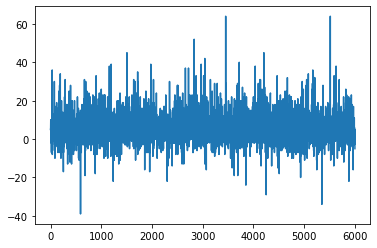

In [5]:
#i can see that passasjerer ombord have a negative value, check if there is more negative values using plot line
df["Passasjerer_Ombord"].plot.line()

In [6]:
#sees that there are many negative values, uses abs to get the values to be real.
df['Passasjerer_Ombord'] = df['Passasjerer_Ombord'].apply(abs)

<AxesSubplot:>

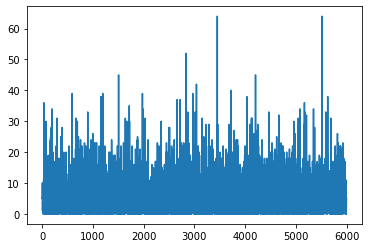

In [7]:
#check to see if it worked
df["Passasjerer_Ombord"].plot.line()

<AxesSubplot:>

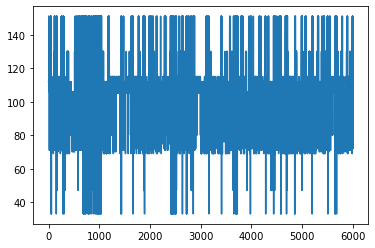

In [8]:
#ok. check if there is a simular problem with Kjøretøy_Kapasitet
df["Kjøretøy_Kapasitet"].plot.line()

In [9]:
#cant see that there is any negative values -> continues. 

In [10]:
df['Ledige_Plasser']=df['Kjøretøy_Kapasitet']-df['Passasjerer_Ombord']

In [11]:
# -> Continues to see if any buss is full 
df['Full_Buss']=df['Ledige_Plasser']==0 

In [17]:
#Convert Bool value (true/false) to 1(full_buss) and 0 (ikke full buss)
df["Full_Buss"] = df["Full_Buss"].astype(int)

<AxesSubplot:>

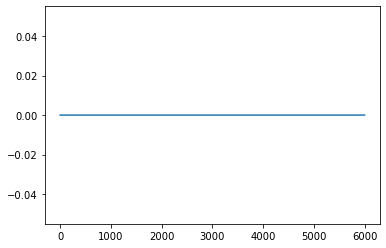

In [19]:
#graph for full buss (as seen no buss is full)
df["Full_Buss"].plot.line()

<AxesSubplot:>

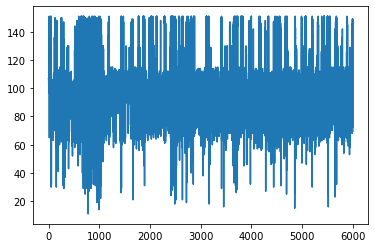

In [21]:
#Graph for ledige plasser
df['Ledige_Plasser'].plot.line()

In [22]:
df['Få_Plasser']=df['Ledige_Plasser']<15 

In [23]:
df["Få_Plasser"] = df["Få_Plasser"].astype(int)

<AxesSubplot:>

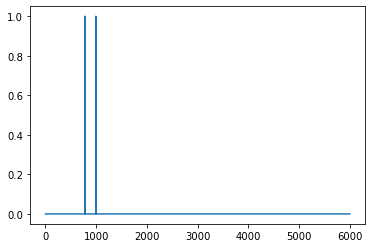

In [24]:
df["Få_Plasser"].plot.line()

In [27]:
#Check out what kind of data the time is given in 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   TurId                                      6000 non-null   object
 1   Dato                                       6000 non-null   object
 2   Fylke                                      6000 non-null   object
 3   Område                                     6000 non-null   object
 4   Kommune                                    6000 non-null   object
 5   Holdeplass_Fra                             6000 non-null   object
 6   Holdeplass_Til                             6000 non-null   object
 7   Linjetype                                  6000 non-null   object
 8   Linjefylke                                 6000 non-null   object
 9   Linjenavn                                  6000 non-null   object
 10  Linjeretning                        

In [28]:
#We now ned to convert tidspunktene from object to time
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce') 
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce') 
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce') 
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], errors='coerce') 

In [29]:
df['Forsinkelse_Avgang']=df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra']-df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']

In [30]:
df['Forsinkelse_Avgang']

0      0 days 00:00:59
1      0 days 00:00:26
2      0 days 00:00:21
3      0 days 00:01:26
4      0 days 00:01:53
             ...      
5995   0 days 00:13:48
5996   0 days 00:01:40
5997   0 days 00:11:10
5998   0 days 00:01:23
5999   0 days 00:02:48
Name: Forsinkelse_Avgang, Length: 6000, dtype: timedelta64[ns]

In [31]:
#Now we need to convert time and date to secounds. 
df['Forsinkelse_Avgang'] = df["Forsinkelse_Avgang"].dt.total_seconds()

In [32]:
#We can do the same task for "Forsinkelse Ankomst"
df['Forsinkelse_Ankomst']=df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']-df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']
df['Forsinkelse_Ankomst'] = df["Forsinkelse_Ankomst"].dt.total_seconds()

<AxesSubplot:>

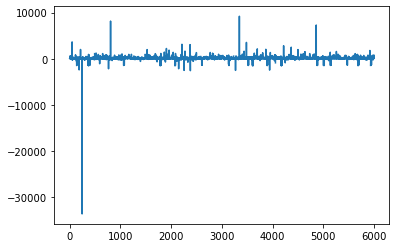

In [36]:
#Graph for forsinkelse_avgang
df['Forsinkelse_Avgang'].plot.line()

<AxesSubplot:>

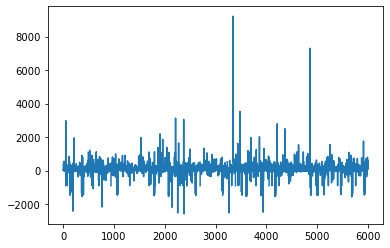

In [37]:
#Graph for forsinkelse_ankomst
df['Forsinkelse_Ankomst'].plot.line()